**Project**: Flight Booking Price Prediction

In [1]:
# Importing the library files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading the data

In [2]:
data = pd.read_csv('/content/Flight_Booking.csv')
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.shape

(300153, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Checking out the missing values in a dataframe.

In [5]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data=data.drop(columns=['Unnamed: 0'])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


**Data Visualization**

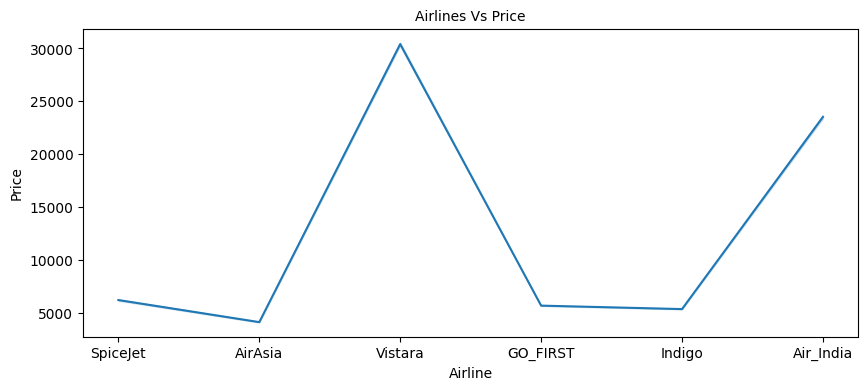

In [16]:
plt.figure(figsize=(10,4))
sns.lineplot(x=data['airline'], y=data['price'])
plt.title('Airlines Vs Price', fontsize=10)
plt.xlabel('Airline', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

There is a variation in price with
different airlines

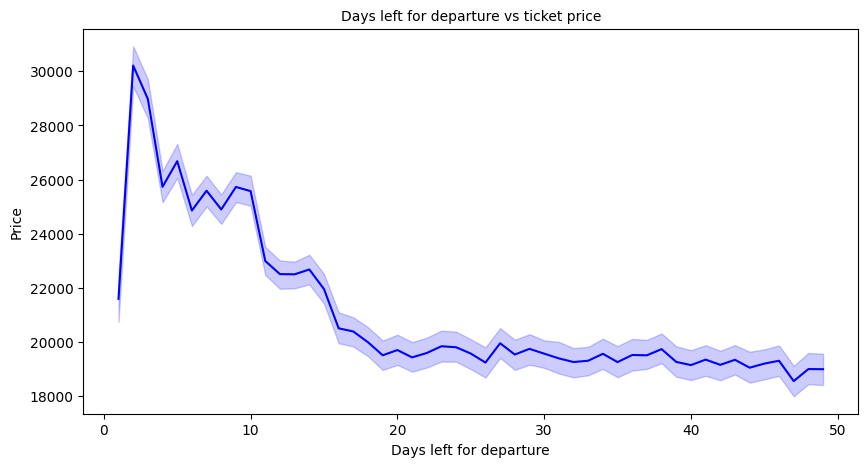

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='days_left', y='price',color='blue')
plt.title('Days left for departure vs ticket price', fontsize=10)
plt.xlabel('Days left for departure', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

The price of the ticket
increases as the days left for
departure decreases

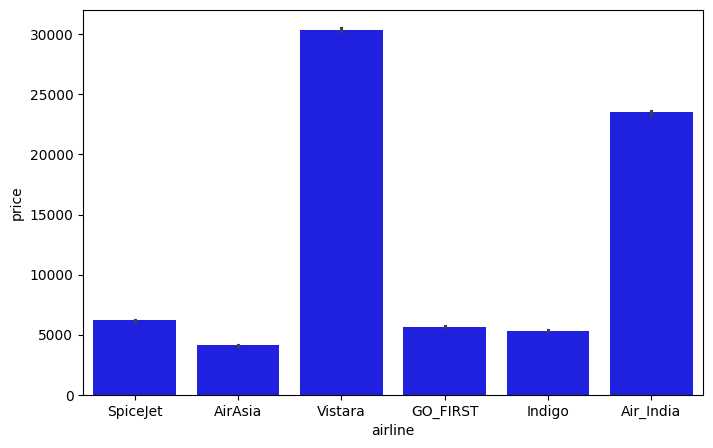

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='airline',y='price', color='blue')
plt.show()

Price range of all the fligts

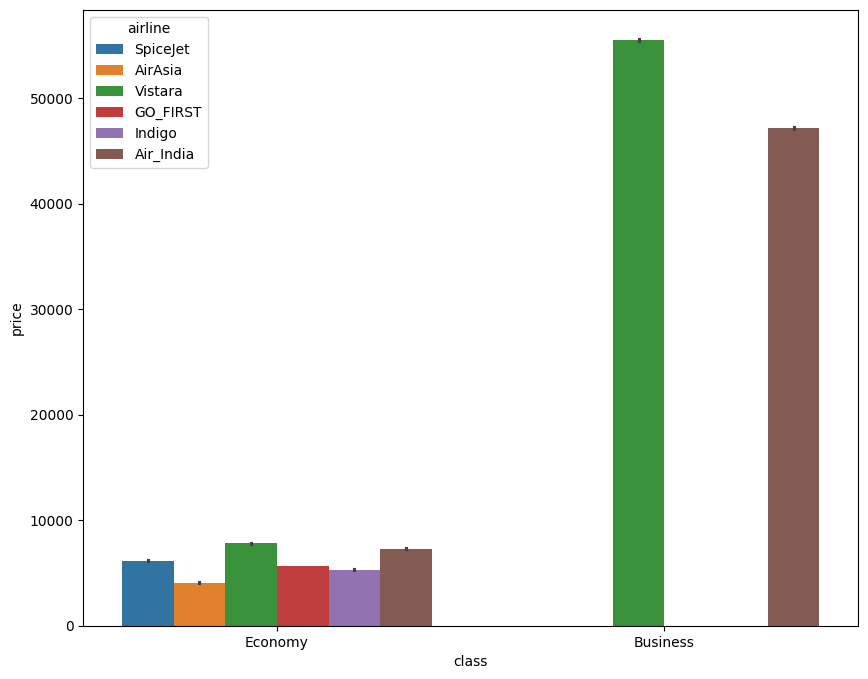

In [25]:
# Range of price of all the flights of Economy and Business class

plt.figure(figsize=(10,8))
sns.barplot(data=data,x='class',y='price',hue='airline')
plt.show()

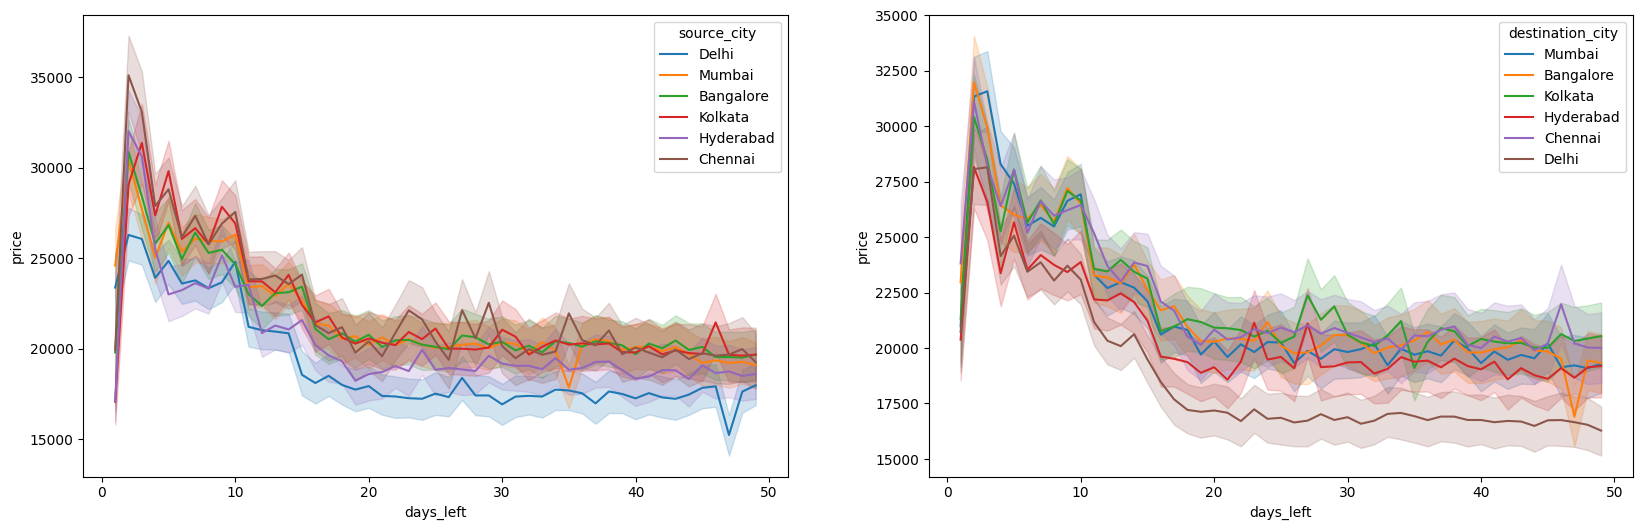

In [26]:
# Range of price of flights with source and destination city according to the days left

fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=data, x='days_left', y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=data, x='days_left', y='price',hue='destination_city',ax=ax[1])
plt.show()

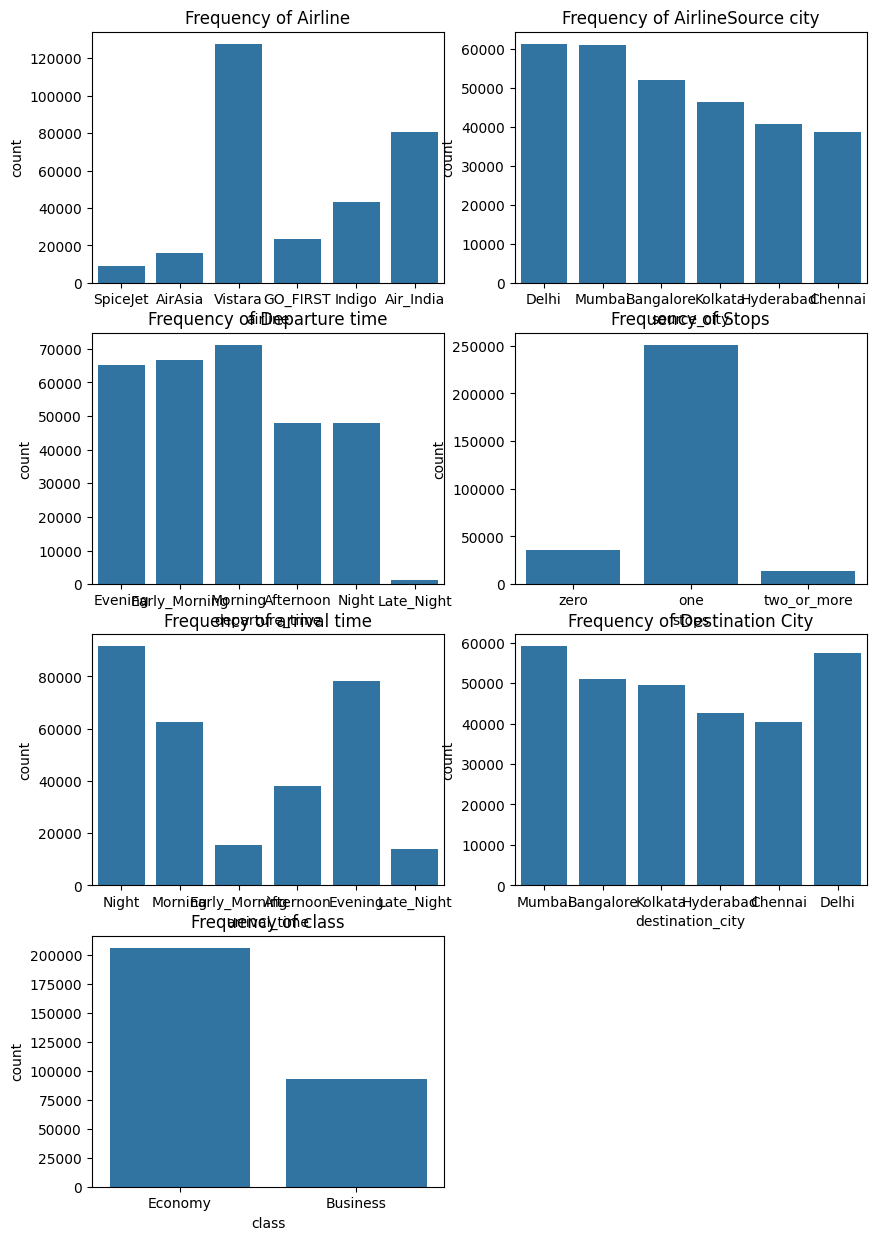

In [33]:
# Visualization of categorical features with countplot

plt.figure(figsize=(15,21))


plt.subplot(4,2,1)
sns.countplot(x=data["airline"],data=data)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=data["source_city"],data=data)
plt.title('Frequency of AirlineSource city')

plt.subplot(4,2,3)
sns.countplot(x=data["departure_time"],data=data)
plt.title('Frequency of Departure time')

plt.subplot(4,2,4)
sns.countplot(x=data["stops"],data=data)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=data["arrival_time"],data=data)
plt.title('Frequency of arrival time')

plt.subplot(4,2,6)
sns.countplot(x=data["destination_city"],data=data)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=data["class"],data=data)
plt.title('Frequency of class')

plt.show()

In [43]:
# Get a list of all column names in the DataFrame
col = list(data.columns)

# Initialize an empty list to store the column names of categorical features
col_list = []

# Iterate over each column name in the list of all column names
for i in col:
    # Check if the data type of the column is 'object', indicating a categorical feature
    if data[i].dtype == 'object':
        # If the data type is 'object', add the column name to the list of categorical features
        col_list.append(i)

# Output the list of column names representing categorical features
col_list


['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [45]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
le = LabelEncoder()

# Iterate through each column name in the list of categorical features
for i in col_list:
    # Apply label encoding to the current column and replace it with the transformed values
    data[i] = le.fit_transform(data[i])

# Output the information about the DataFrame after label encoding
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  int64  
 2   flight            300153 non-null  int64  
 3   source_city       300153 non-null  int64  
 4   departure_time    300153 non-null  int64  
 5   stops             300153 non-null  int64  
 6   arrival_time      300153 non-null  int64  
 7   destination_city  300153 non-null  int64  
 8   class             300153 non-null  int64  
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 27.5 MB


# **Feature Selection**

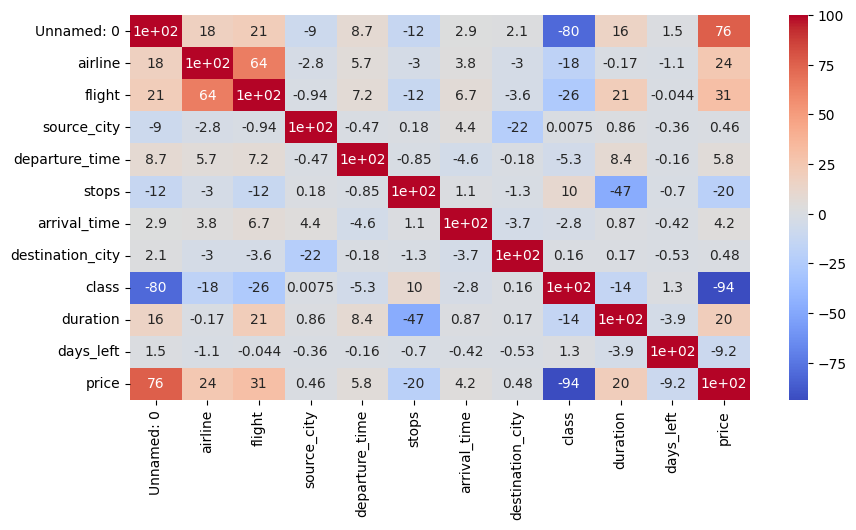

In [48]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()*100, annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Create an empty list to store column names of numerical features (excluding the target variable 'price')
col_list = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if the column is numerical (not 'object') and not the target variable
    if ((data[i].dtype != 'object') and (i != 'price')):
        # Append the column name to the list of numerical features
        col_list.append(i)

# Create a new DataFrame containing only the numerical features
X = data[col_list]

# Calculate VIF for each feature
vif_values = [VIF(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame to store the feature names and their corresponding VIF values
vif_data = pd.DataFrame({'feature': X.columns, 'VIF': vif_values})

# Print the DataFrame containing feature names and their corresponding VIF values
print(vif_data)


             feature        VIF
0         Unnamed: 0   6.594684
1            airline   6.808848
2             flight  13.019774
3        source_city   3.010180
4     departure_time   2.919893
5              stops   1.465700
6       arrival_time   3.980668
7   destination_city   3.126129
8              class   4.537624
9           duration   5.170300
10         days_left   4.427888


In [52]:
data=data.drop(columns=["Unnamed: 0"])

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
col_list=[]
for i in data.columns:
  if((data[i].dtype!='object')& (i != 'price')):
    col_list.append(i)

X=data[col_list]
vif_data = pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[VIF(X.values,i) for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [54]:
data=data.drop(columns=["flight"])

In [100]:
# Import necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Create an empty list to store column names of numerical features (excluding the target variable 'price')
col_list = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if the column is numerical (not 'object') and not the target variable
    if ((data[i].dtype != 'object') and (i != 'price')):
        # Append the column name to the list of numerical features
        col_list.append(i)

# Create a new DataFrame containing only the numerical features
X = data[col_list]

# Create an empty DataFrame to store the VIF values for each feature
vif_data = pd.DataFrame()

# Add 'feature' column to the DataFrame with column names
vif_data['feature'] = X.columns

# Calculate VIF for each feature and store the results in the 'VIF' column of the DataFrame
vif_data['VIF'] = [VIF(X.values, i) for i in range(len(X.columns))]

# Print the DataFrame containing feature names and their corresponding VIF values
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# **Linear Regression**



In [98]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame containing features and target variable
# Drop the target variable ('price') from the DataFrame to create the feature matrix 'X'
X = data.drop(columns=['price'])

# Extract the target variable ('price') and store it in 'y'
y = data['price']

# Split the dataset into training and testing sets, with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform the training data using the StandardScaler
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the Linear Regression model on the scaled training data
lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = lr.predict(x_test_scaled)

# Create a DataFrame to compare actual values (y_test) with predicted values (y_pred)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [99]:
# Import necessary libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Calculate R-squared (coefficient of determination) to evaluate the model's goodness of fit
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE) to measure the average absolute errors between predicted and actual values
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate Mean Absolute Percentage Error (MAPE) to measure the percentage of absolute errors relative to actual values
# Note: MAPE might not be well-defined for zero values in 'y_test'
mbpe = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mbpe)

# Calculate Mean Squared Error (MSE) to measure the average squared differences between predicted and actual values
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate Root Mean Squared Error (RMSE) to measure the square root of MSE, which is in the same units as the target variable
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)


R-squared: 0.904554350718816
Mean Absolute Error: 4624.994868016881
Mean Absolute Percentage Error: 0.4353581089683269
Mean Squared Error: 49200540.293722
Root Mean Squared Error: 7014.309680483319


Plotting the graph of actual and predicted price of flight

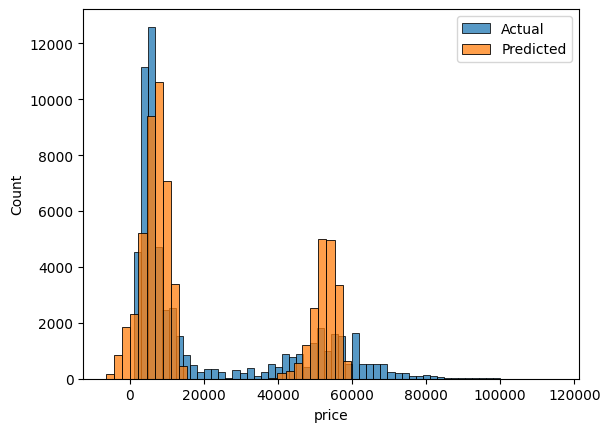

In [78]:
sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()

# **Decision Tree Regressor**

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

# Create a DecisionTreeRegressor instance
dt = DecisionTreeRegressor()

# Fit the Decision Tree Regressor to the training data
dt.fit(x_train, y_train)

# Predict target values for the test data
y_pred = dt.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculate the mean absolute error
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate the mean absolute percentage error
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mean_abs_percentage_error)

# Calculate the mean squared error
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate the root mean squared error
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)


R-squared score: 0.9757288337994303
Mean Absolute Error: 1173.6412103746397
Mean Absolute Percentage Error: 0.07425109422734726
Mean Squared Error: 12511355.935237627
Root Mean Squared Error: 3537.139513114747


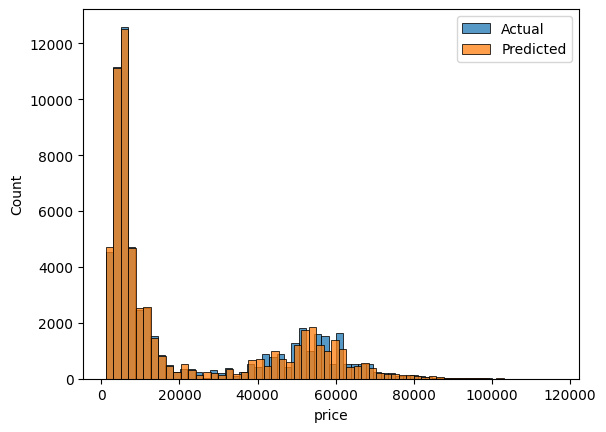

In [103]:
sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()

# **Random Forest Regressor**

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Create a RandomForestRegressor instance
rfr = RandomForestRegressor()

# Fit the Random Forest Regressor to the training data
rfr.fit(x_train, y_train)

# Predict target values for the test data
y_pred = rfr.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculate the mean absolute error
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate the mean absolute percentage error
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mean_abs_percentage_error)

# Calculate the mean squared error
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate the root mean squared error
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)

R-squared score: 0.9849462534025653
Mean Absolute Error: 1089.639822538045
Mean Absolute Percentage Error: 0.07044327181830619
Mean Squared Error: 7759939.521775361
Root Mean Squared Error: 2785.666800206974


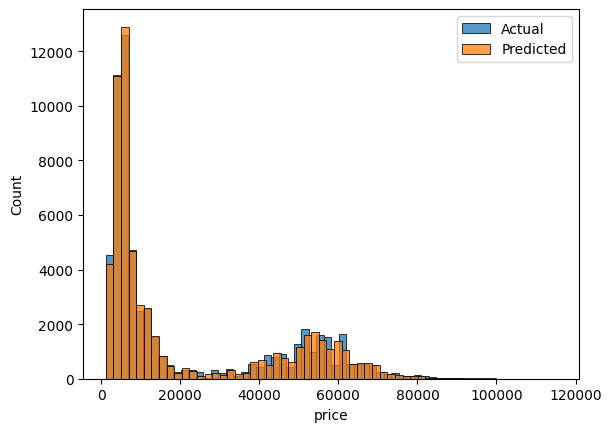

In [105]:
sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()

The Random Forest model demonstrates superior performance compared to the Linear Regression and Decision Tree models based on the evaluation metrics. The Mean Absolute Percentage Error (MAPE) of 7% indicates that, on average, the Random Forest model's predictions deviate from the actual values by approximately 7%. Additionally, the Root Mean Squared Error (RMSE) of 2785 suggests that the average prediction error of the Random Forest model is lower compared to both Linear Regression and Decision Tree models. Therefore, we can conclude that the Random Forest model provides better predictive accuracy for the given dataset.
